## Enron
Create a synthetic graph from the Enron email network and compare the  metrics between the original graph and synthetic graph for intrinsic validation.

In [1]:
# import modules
import os
os.chdir('..')
print(os.getcwd())

import pickle
from tigger_package.orchestrator import Orchestrator
from tigger_package.tools import plot_adj_matrix
import networkx as nx 
import time
GRID_SEARCH = True
folder = "data/enron/"

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj
loaded


## GRAPHSAGE hyperparam

Epoch: 099, Loss: 0.6415,  Test: 0.6337Early stopping after 100 epochs with no improvement in validation loss.
Total training time 11.8148s


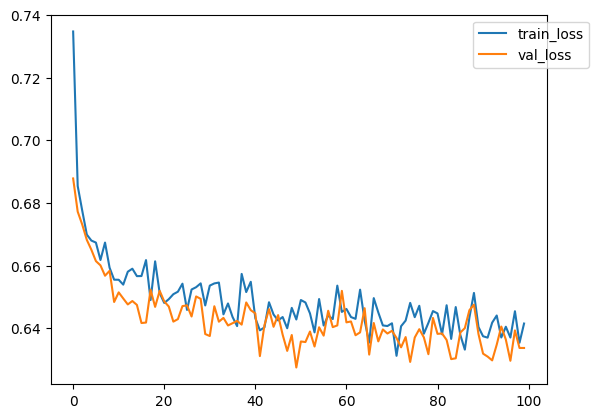

Epoch: 176, Loss: 0.6231,  Test: 0.6192Early stopping after 177 epochs with no improvement in validation loss.
Total training time 23.8725s


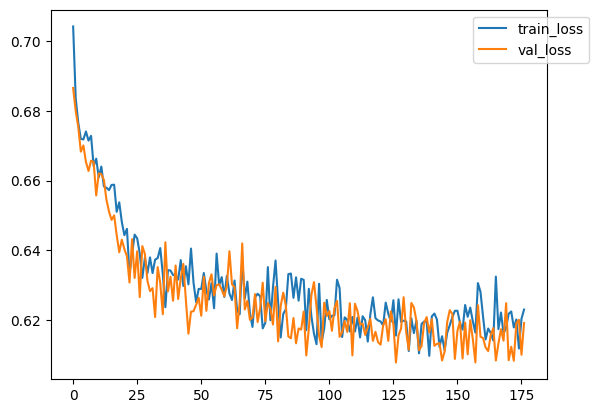

loss: [0.6397122173346046, 0.619455165807326]
val loss: [0.6340594382281007, 0.6154739742100523]


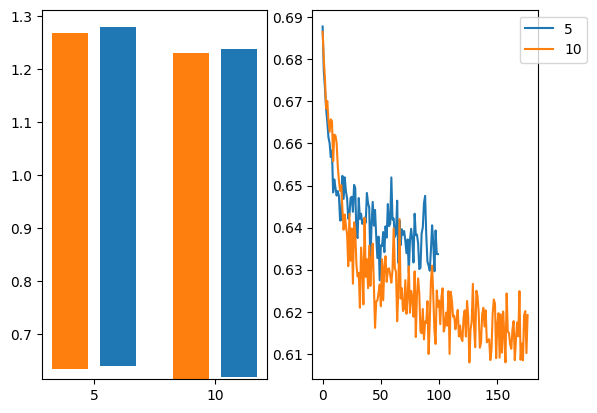

In [2]:
# train graphsage
if GRID_SEARCH:
    enron_folder = "data/enron/"
    orchestrator = Orchestrator(enron_folder)
    grid_res = orchestrator.lin_grid_search_graphsage({"num_neighbors": [[5, 5], [10,10]]})

## Train final graphsage embedding

Epoch: 1700, Loss: 0.5731,  Test: 0.5646Early stopping after 1701 epochs with no improvement in validation loss.
Total training time 292.3019s


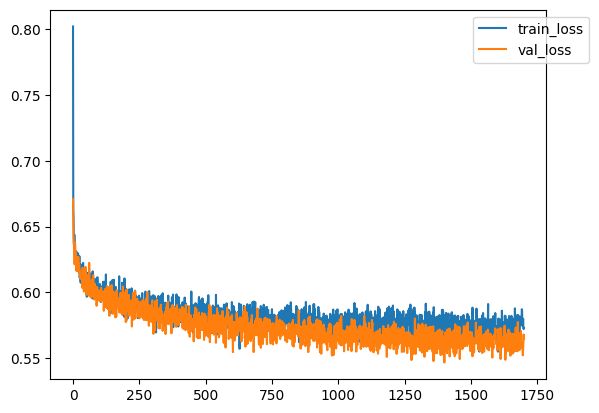

/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/pandas/io/parquet.py:189: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


In [2]:
# train graphsage
enron_folder = "data/enron/"
orchestrator = Orchestrator(enron_folder)
train_metrics = orchestrator.create_graphsage_embedding()

In [9]:
# save results
import pickle
train_config = orchestrator.config.copy()
train_config['metrcis'] = train_metrics
res_filename = 'data/enron/exp_results/graphcase_final_run_metrics.pickle'
pickle.dump(train_config, open(res_filename, 'wb'))

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

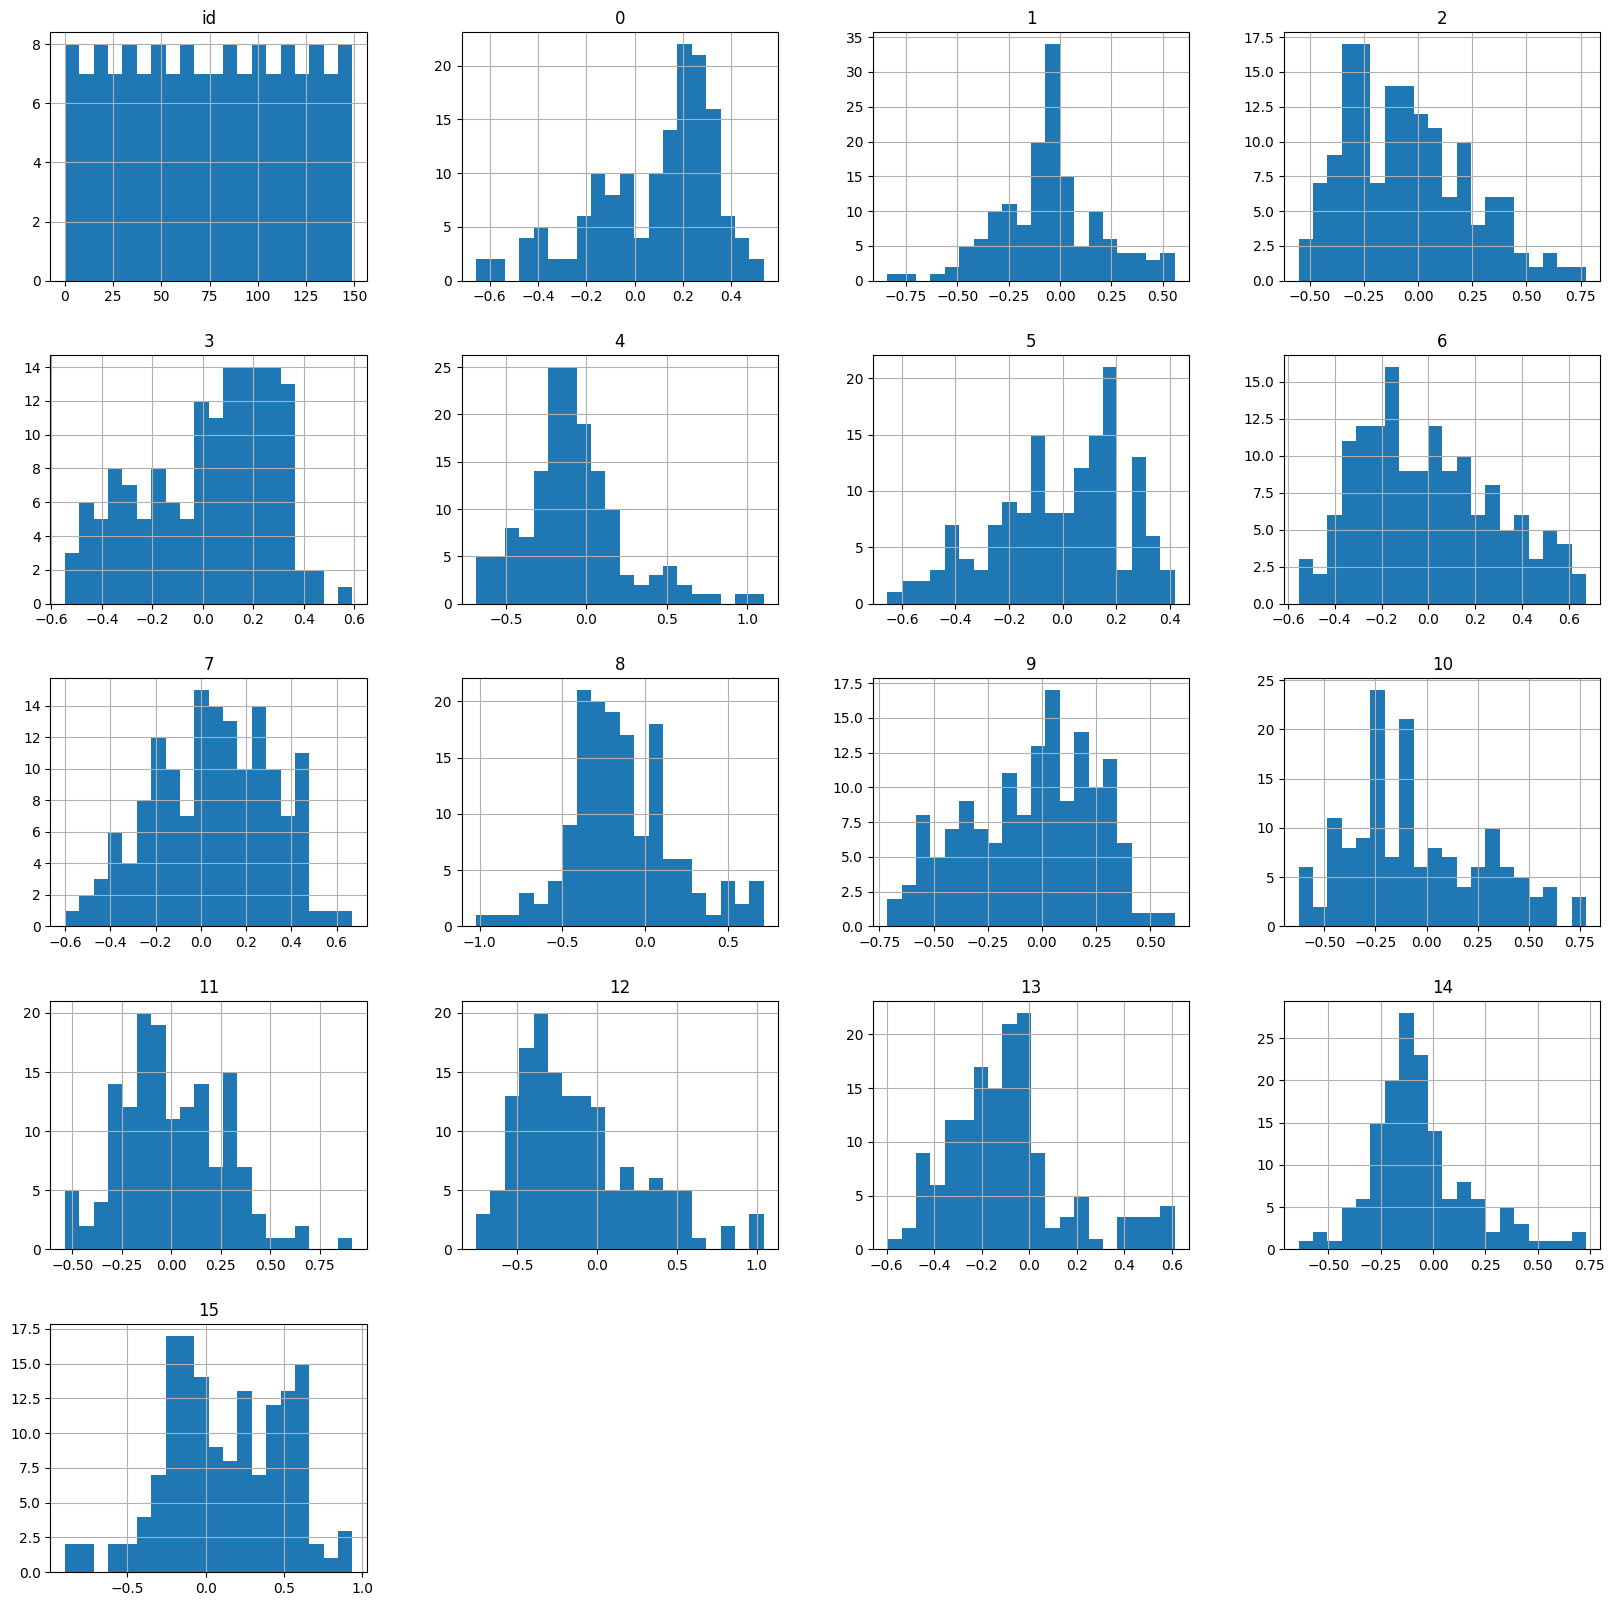

In [10]:
# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
embed = pd.read_parquet("data/enron/embed/embedding.parquet")
embed.to_parquet("data/enron/embed/embedding_final.parquet")
embed.to_csv("data/enron/embed/embedding_final.csv", sep='\t', header=False, index=False, )
embed.hist(figsize=(20,20), bins=20)

## flownet training

Epoch 1461/3000  ['loss:-142.66001892089844', 'val_loss:-102.1270751953125']]

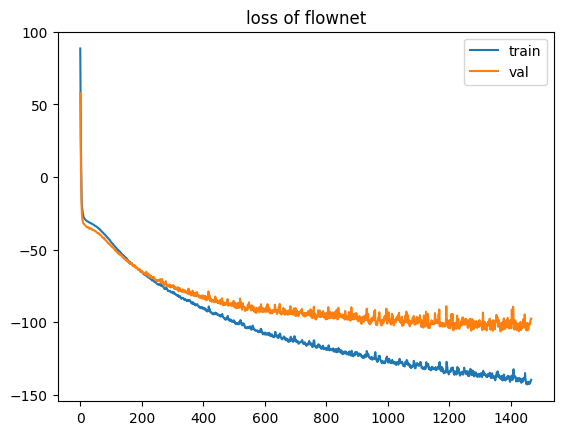

Epoch 1301/3000  ['loss:-133.27618408203125', 'val_loss:-103.09242248535156']

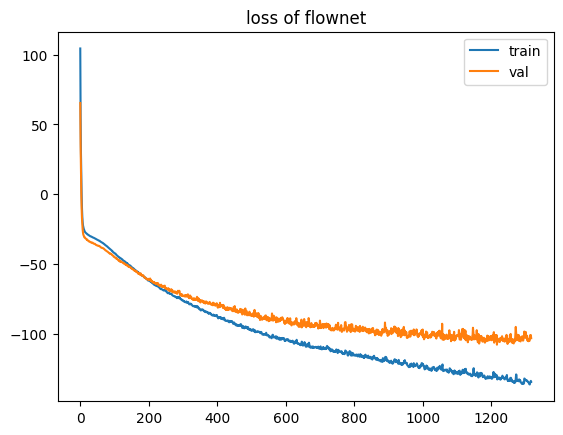

Epoch 1301/3000  ['loss:-141.7265625', 'val_loss:-114.53518676757812']0156']]

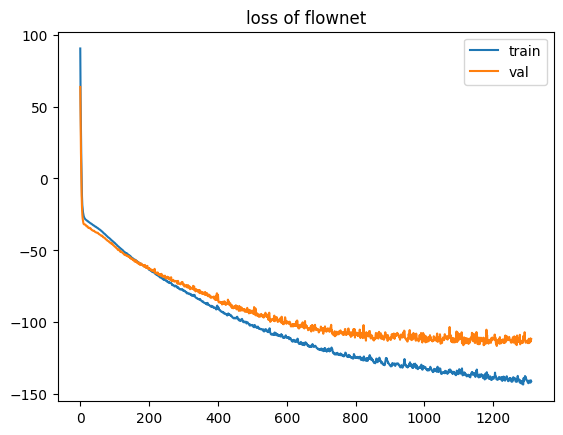

loss: [-140.58978652954102, -134.60930252075195, -141.27957916259766]
val loss: [-98.63990592956543, -102.07648086547852, -112.49878120422363]
Duration: 119.48980188369751


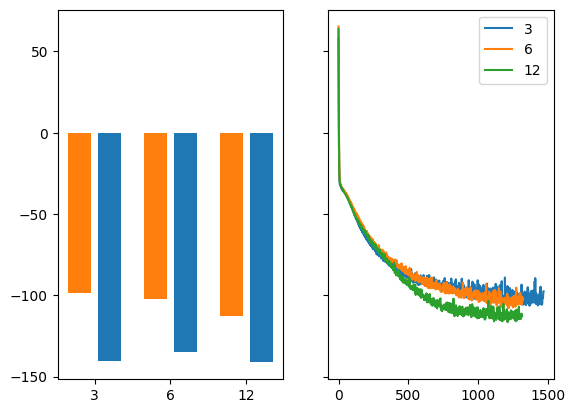

In [10]:
if GRID_SEARCH:
    enron_folder = "data/enron/"
    orchestrator = Orchestrator(enron_folder)
    start = time.time()
    res = orchestrator.lin_grid_search_flownet({"  number_of_bijectors": [3,6,12]})
    end = time.time()
    print(f"Duration: {end-start}")

Epoch 1041/3000  ['loss:-132.60154724121094', 'val_loss:-106.17777252197266']

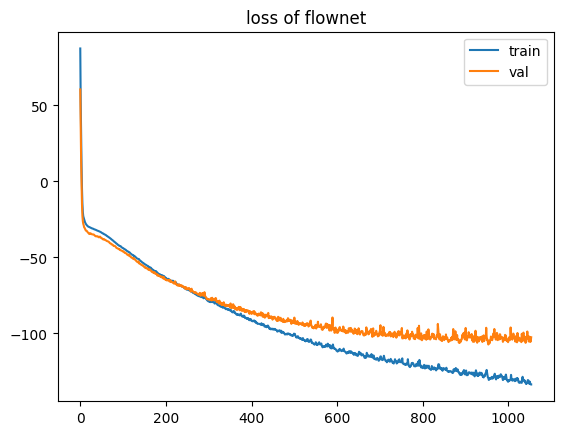

In [11]:
#final flow model
enron_folder = "data/enron/"
orchestrator = Orchestrator(enron_folder)
name, history = orchestrator.train_flow()

In [12]:
# save results
import pickle
train_config = orchestrator.config.copy()
train_config['metrics'] = history.history
res_filename = 'data/enron/exp_results/flownet_final_run_metrics.pickle'
pickle.dump(train_config, open(res_filename, 'wb'))

In [13]:
# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
filepath = orchestrator.config_path + orchestrator.config['flownet']['flownet_config_path']
obj = pickle.load(open(filepath + name, 'rb'))
pickle.dump(obj,open(filepath + "final_flowmodel.pickle", 'wb'))

## sample flownet

In [14]:
# Sample flow net
# enron_folder = "data/enron/"
# orchestrator = Orchestrator(enron_folder)
model_name = "flowmodel_final.pickle"
orchestrator.sample_flownet()

In [15]:

# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
synth_nodes = pd.read_parquet('data/enron/synth_nodes.parquet')
synth_nodes.to_parquet('data/enron/synth_nodes_final.parquet')
synth_nodes.to_csv("data/enron/synth_nodes_files.csv", sep='\t', header=False, index=False, )

In [16]:
enron_folder = "data/enron/"
orchestrator = Orchestrator(enron_folder)
orig_node = orchestrator._load_nodes()
orig_embed = orchestrator.load_normalized_embed()
x_data = orig_embed.join(orig_node, how='inner')


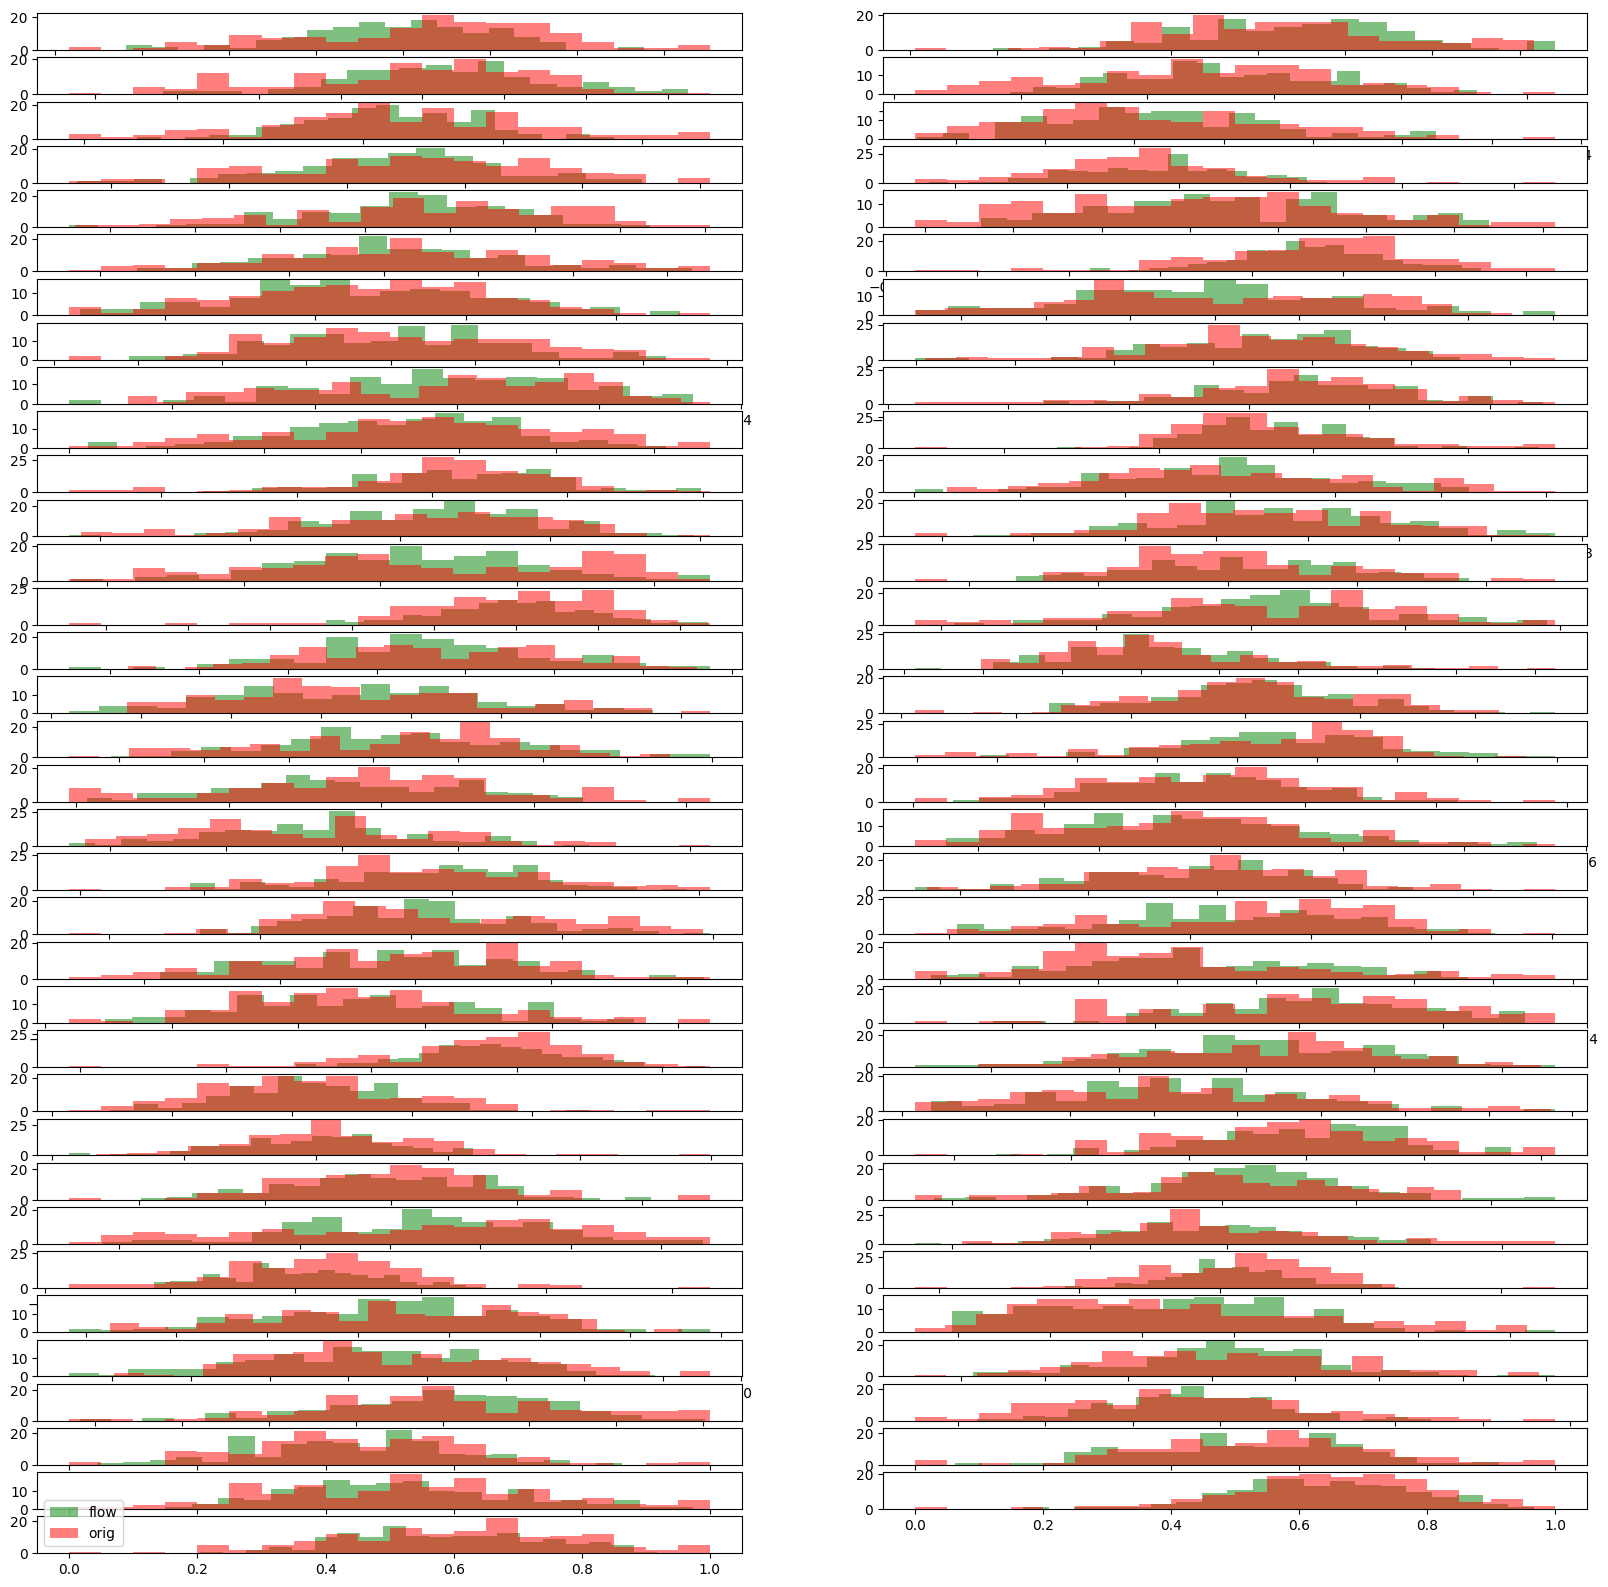

In [17]:
# plot samples embedding
import matplotlib.pyplot as plt
import math
fig = plt.figure(figsize=(20,20))
dim = synth_nodes.shape[1]
for i in range(dim):
    ax = fig.add_subplot(math.ceil(dim/2),2, i+1)
    ax.hist(synth_nodes.loc[:, i], bins=20, alpha=0.5, color='g', label='flow')
    ax.hist(x_data.iloc[:, i], bins=20, alpha=0.5, color='r', label='orig')

plt.legend()
plt.show()


## train lstm

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/inductive_controller.py:232: UserWarning: feat df has 150 rows and vocab has 151 instead of 152. This can be cause by unconnected nodes.
  warnings.warn(f"feat df has {nodes.shape[0]} rows and vocab has {node_attr.shape[0]} instead of {nodes.shape[0] + 2}. This can be cause by unconnected nodes.")
/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  0%|          | 0/2689 [00:00<?, ?it/s]

Number of components, 18


/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 9950 / 10000, epoch:399 loss=4.254056930541992, val_loss: 10.6184206008911137

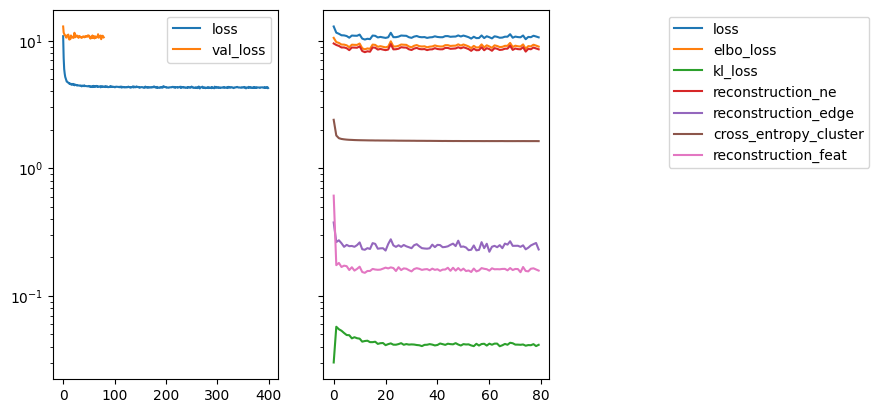

In [3]:
enron_folder = "data/enron/"
orchestrator = Orchestrator(enron_folder)
# res = orchestrator.lin_grid_search_lstm({'n_walks': [1000, 3000, 10000]})
loss_dict = orchestrator.train_lstm()
# loss=3.529276132583618, val_loss: 3.1
# 

In [4]:
# create synthetic walks
# loss_dict = orchestrator.train_lstm()
orchestrator.create_synthetic_walks(target_cnt=6000, map_real_time=False)

In [5]:
# convert final embedding to csv for tensorflow embedding viewer
import pickle
obj = pickle.load(open('data/enron/synth_walks.pickle', 'rb'))
pickle.dump(obj, open('data/enron/synth_walks_final.pickle', 'wb'))

## train and sample synthesizer

/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 epoch 5000/5000 train loss 1.3819400151570638 val loss: 1.3133124113082886

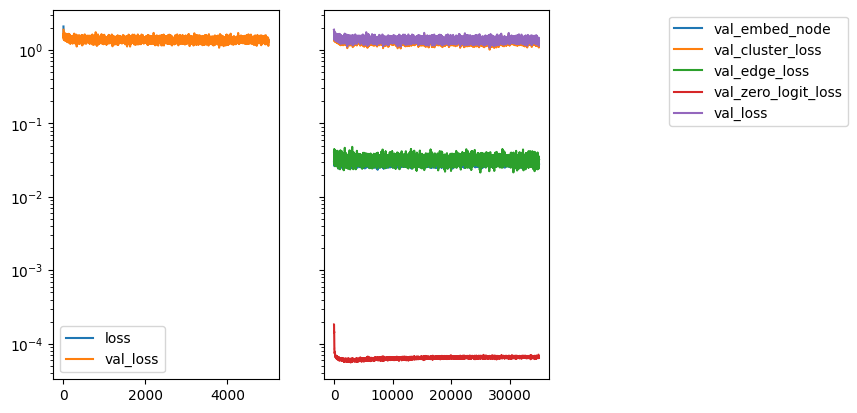

In [2]:
orchestrator = Orchestrator(folder)
loss_dict = orchestrator.train_graphsyntesizer2()
# 1.4

In [3]:
orchestrator.create_synthetic_walks(synthesizer=orchestrator.graphsynthesizer2, target_cnt=6000, map_real_time=False)
obj = pickle.load(open('data/enron/synth_walks.pickle', 'rb'))
pickle.dump(obj, open('data/enron/synth_walks_final_v2.pickle', 'wb'))

## create synthetic graph

In [4]:
enron_folder = "data/enron/"
orchestrator = Orchestrator(enron_folder)
orchestrator.config['synth_walks'] = 'synth_walks_final_v2.pickle'
orchestrator.generate_synth_graph()

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/inductive_controller.py:231: UserWarning: feat df has 150 rows and vocab has 151 instead of 152. This can be cause by unconnected nodes.
  warnings.warn(f"feat df has {nodes.shape[0]} rows and vocab has {node_attr.shape[0]} instead of {nodes.shape[0] + 2}. This can be cause by unconnected nodes.")
/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  0%|          | 0/2689 [00:00<?, ?it/s]

Number of components, 18


/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [5]:
import pandas as pd
embed = pd.read_parquet('data/enron/synth_graph/node_attributes.parquet')
embed.to_parquet('data/enron/synth_graph/node_attributes_final.parquet')
embed = pd.read_parquet('data/enron/synth_graph/adjacency.parquet')
embed.to_parquet('data/enron/synth_graph/adjacency_final_v2.parquet')